# Example 1

It's a very simple two dimensional example with function which depends on value of the second principal component (so PCA returns the first component, EDR-GP - the second one)

In [1]:
import regression
import edrgp
import seaborn as sns
sns.set()
%matplotlib inline

### Generate toy dataset

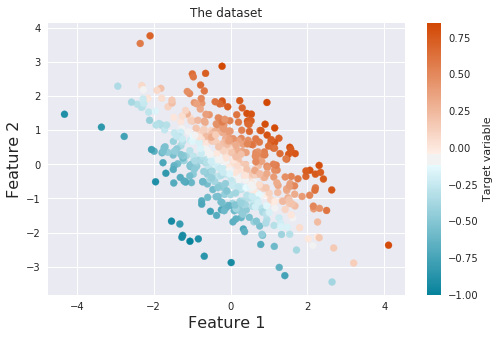

In [2]:
X, y = regression.get_2d_data()
regression.plot_data(X, y)

It's a simple 2D function with some gaussian noise

## Apply Principal Component Analysis

Mutual information beween the target and the found linear combination is 0.000


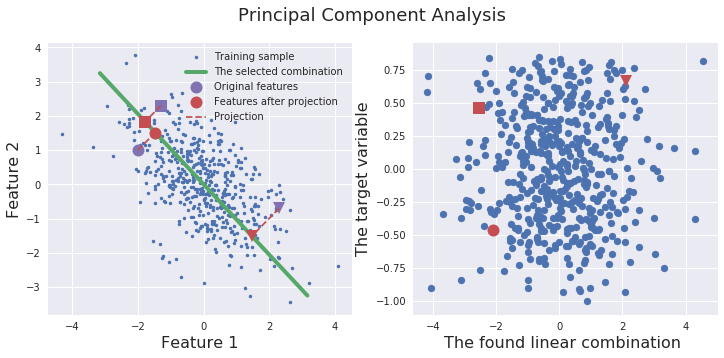

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
regression.plot_dr_component(X, y, pca, 'Principal Component Analysis')

#### As we can see, PCA has produced a component which is unusefull for prediciton.

## Apply Effective Dimensionality Reduction

Mutual information beween the target and the found linear combination is 2.102


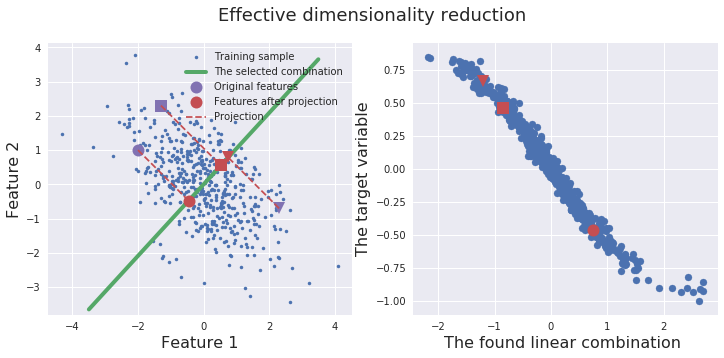

In [4]:
from edrgp.regression import GaussianProcessRegressor
from edrgp.edr import EffectiveDimensionalityReduction
edr = EffectiveDimensionalityReduction(GaussianProcessRegressor(),
                                       PCA(n_components=1), normalize=True)
edr.fit(X, y)
regression.plot_dr_component(X, y, edr, 'Effective dimensionality reduction')

### Let us compare explained variance ratio

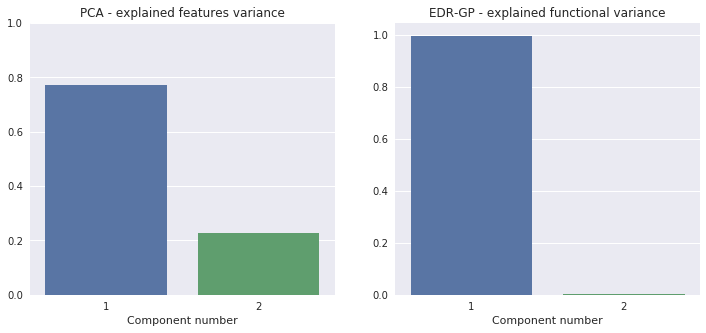

In [5]:
regression.plot_explained_variance(X, y)